# When Does The Brain Reach It's Peak In Art?


## The Museum of Modern Art (MoMA) Collection

The Museum of Modern Art (MoMA) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years.
MoMA is committed to helping everyone understand, enjoy, and use it collection. The Museum’s website features 88,398 artworks from 26,422 artists. [This research dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artworks.csv) contains 138,161 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in its database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. At this time, the dataset is available in CSV format, encoded in `UTF-8`.

Description of some of the MoMA's columns we are interested in:

- `Title`: The title of the artwork.
- `Artist`: The name of the artist who created the artwork.
- `Nationality`: The nationality of the artist.
- `BeginDate`: The year in which the artist was born.
- `EndDate`: The year in which the artist died.
- `Gender`: The gender of the artist.
- `Date`: The date that the artwork was created.
- `Department`: The department inside MoMA to which the artwork belongs.
- `Medium`: Description of the artwork.
- `Classification`: The kind of the artwork.


## Introduction

Scientists say that the human brain reaches its peak efficiency by the age of 30. For instance, you can read *Chapter 6* of [Behave: The Biology of Humans at Our Best and Worst](https://www.amazon.com/Behave-Biology-Humans-Best-Worst/dp/1594205078) by [Robert M. Sapolsky](https://en.wikipedia.org/wiki/Robert_Sapolsky).  

We discovered the Moma dataset and wondered *if most of the artworks were actually created by artists in their 30s*.  

We'll proceed from the assumption that, since the artworks have been preserved and included in the collection of the museum, they represent a valuable result of the human brain activity. 

We'll calculate the age when the artist created his work as the difference between the `Date` and the `BeginDate` columns.  
Then we'll create a plot to see *at what age the most of the valuable artworks were created*.


## Reading The MoMA Dataset

Let's take a look at the data.

In [1]:
# Import libs
from numpy import nan
import pandas as pd
import re

# Set width of display
print('display.width:', pd.get_option('display.width'))
pd.set_option('display.width', 120)
print('display.width:', pd.get_option('display.width'))

# Get data
moma = pd.read_csv('data/Artworks.csv')
moma.head()

display.width: 80
display.width: 120


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [2]:
moma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138161 entries, 0 to 138160
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138122 non-null  object 
 1   Artist              136847 non-null  object 
 2   ConstituentID       136847 non-null  object 
 3   ArtistBio           132113 non-null  object 
 4   Nationality         136847 non-null  object 
 5   BeginDate           136847 non-null  object 
 6   EndDate             136847 non-null  object 
 7   Gender              136847 non-null  object 
 8   Date                135936 non-null  object 
 9   Medium              127923 non-null  object 
 10  Dimensions          128078 non-null  object 
 11  CreditLine          135629 non-null  object 
 12  AccessionNumber     138161 non-null  object 
 13  Classification      138161 non-null  object 
 14  Department          138161 non-null  object 
 15  DateAcquired        131029 non-nul

We see 138,161 artworks. Almost all of the columns contain `null` values.


## Exploring The Data

Now, we'll overview the `NaN` values in the data.

In [3]:
# Number of null values per column
moma_nan_cnt = moma[['Title', 'Artist', 'ArtistBio', 'Nationality', 'BeginDate', 'EndDate',
                     'Gender', 'Date', 'Department']].isnull().sum()

# Percentage of null values
moma_nan_pct = moma_nan_cnt / moma.shape[0] * 100

moma_nan = pd.DataFrame({'nan_count': moma_nan_cnt, 'nan_percentage': moma_nan_pct})
moma_nan

,nan_count,nan_percentage
Title,39,0.028228
Artist,1314,0.951064
ArtistBio,6048,4.377502
Nationality,1314,0.951064
BeginDate,1314,0.951064
EndDate,1314,0.951064
Gender,1314,0.951064
Date,2225,1.610440
Department,0,0.000000


It looks like there is no artist defined for 1314 (0.95%) artworks (`Artist`, `Nationality`, `BeginDate`, `EndDate`, `Gender` columns). The important column `Date` contains 1.6% empty values.

Let's find duplicate artworks in the dataset using the unique identifier of the object `ObjectID`.

In [4]:
# Duplicated
print('Duplicated: {}'.format(moma.duplicated(subset='ObjectID').sum()))

Duplicated: 0


Fortunately, there are no duplicates!

Let's inspect **the `ArtistBio` column**.

In [5]:
artist_bio_pattern_org = r'(?:founded|established|est\.|active|formed)'

# Value examples
moma.loc[((moma['ArtistBio'].notnull())
          & (moma['ArtistBio'].str.contains(artist_bio_pattern_org, flags=re.I))
         ),
         ['Title', 'Artist', 'ConstituentID', 'ArtistBio',
          'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date'
         ]
        ].head(15)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date
151,"Slow House Project, North Haven, New York, Pla...","Diller + Scofidio, Elizabeth Diller, Ricardo S...","8707, 6951, 6952","(American, established 1979) (American, born P...",(American) (American) (American),(1979) (1954) (1935),(0) (0) (0),() (Female) (Male),1989
160,"City Hall, project, North Canton, Ohio, Perspe...","Venturi and Rauch, Robert Venturi, John Rauch","8213, 6132, 8214","(American, est. 1964–1979) (American, 1925–201...",(American) (American) (American),(1964) (1925) (1930),(1979) (2018) (0),() (Male) (Male),1965
161,"House, Northern Delaware, Preliminary study of...","Venturi and Rauch, Robert Venturi, John Rauch,...","8213, 6132, 8214, 8216","(American, est. 1964–1979) (American, 1925–201...",(American) (American) (American) (American),(1964) (1925) (1930) (1931),(1979) (2018) (0) (0),() (Male) (Male) (Female),1978
162,"Gordon Wu Hall, Princeton University, Princeto...","Venturi, Rauch and Scott Brown, Robert Venturi...","8215, 6132, 8214, 8216","(American, established 1980) (American, 1925–2...",(American) (American) (American) (American),(1980) (1925) (1930) (1931),(0) (2018) (0) (0),() (Male) (Male) (Female),1981
163,"Gordon Wu Hall, Princeton University, Princeto...","Venturi, Rauch and Scott Brown, Robert Venturi...","8215, 6132, 8214, 8216","(American, established 1980) (American, 1925–2...",(American) (American) (American) (American),(1980) (1925) (1930) (1931),(0) (2018) (0) (0),() (Male) (Male) (Female),1981
164,"Lewis Thomas Laboratory for Molecular Biology,...","Venturi, Rauch and Scott Brown, Robert Venturi...","8215, 6132, 8214, 8216","(American, established 1980) (American, 1925–2...",(American) (American) (American) (American),(1980) (1925) (1930) (1931),(0) (2018) (0) (0),() (Male) (Male) (Female),1983
241,"Sixth Street House project, Santa Monica, CA (...","Morphosis, Santa Monica, CA, Thom Mayne, Andre...","29711, 8218, 22884","(founded 1972) (American, born 1944) (American...",() (American) (American),(1972) (1944) (1958),(0) (0) (0),() (Male) (Male),1990
368,"Slow House Project, North Haven, Long Island, ...","Diller + Scofidio, Elizabeth Diller, Ricardo S...","8707, 6951, 6952","(American, established 1979) (American, born P...",(American) (American) (American),(1979) (1954) (1935),(0) (0) (0),() (Female) (Male),1991
450,"Eclectic House Facade, project","Venturi and Rauch, John Rauch, Robert Venturi","8213, 8214, 6132","(American, est. 1964–1979) (American, born 193...",(American) (American) (American),(1964) (1930) (1925),(1979) (0) (2018),() (Male) (Male),1977
582,Charrette Submission for The Museum of Modern ...,"Herzog & de Meuron, Basel, Jacques Herzog, Pie...","7567, 7421, 7422","(est. 1978) (Swiss, born 1950) (Swiss, born 1950)",(Swiss) (Swiss) (Swiss),(1978) (1950) (1950),(0) (0) (0),() (Male) (Male),1997


Let's inspect **the `Gender` column**.

In [6]:
# Value examples
moma['Gender'].value_counts(dropna=False).head(15)

(Male)                    104121
(Female)                   17728
()                          7403
(Male) (Male)               1771
NaN                         1314
(Male) (Male) (Male)         885
(Male) ()                    819
(Male) (Female)              731
() (Male)                    520
(Female) (Male)              489
(Female) (Female)            172
() ()                        146
(Female) (Male) (Male)       110
() (Male) (Female)           106
() (Male) (Male)              97
Name: Gender, dtype: int64

The `Gender` column can contain the following:

- `Male`
- `Female`
- empty value
- combinations of the values above

Let's look at the last case.

In [7]:
gender_pattern_arr = r'(?:\((?:male|female)?\))'

# Value examples
moma.loc[((moma['Gender'].notnull())
          & (moma['Gender'].str.count(gender_pattern_arr, flags=re.I) > 1)
         )
        ]

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
65,"House IV Project, Falls Village, Connecticut (...","Peter Eisenman, Robert Cole","6969, 8134","(American, born 1932)",(American) (),(1932) (0),(0) (0),(Male) (Male),1975,Ink and color ink on frosted polymer sheet,...,http://www.moma.org/media/W1siZiIsIjIxMDA0MSJd...,NaN,NaN,NaN,34.9251,NaN,NaN,113.3477,NaN,NaN
66,"Villa dall'Ava, Paris (Saint-Cloud), France, E...","Rem Koolhaas, Madelon Vriesendorp","6956, 6957","(Dutch, born 1944) (Dutch, born 1945)",(Dutch) (Dutch),(1944) (1945),(0) (0),(Male) (Female),1987,Synthetic polymer paint and ink on paper,...,http://www.moma.org/media/W1siZiIsIjYwMTEyIl0s...,NaN,NaN,NaN,63.5001,NaN,NaN,99.0602,NaN,NaN
76,"Regional Administrative Center, project ""Tries...","Aldo Rossi, Gianni Braghieri, M. Bosshard","7661, 8131, 8180","(Italian, 1931–1997) (Italian, born 1945) (Ita...",(Italian) (Italian) (Italian),(1931) (1945) (0),(1997) (0) (0),(Male) (Male) (Male),1974,Rubbed ink and pastel on whiteprint,...,http://www.moma.org/media/W1siZiIsIjY5MSJdLFsi...,NaN,NaN,NaN,72.4000,NaN,NaN,91.4000,NaN,NaN
107,"Woodland Crematorium, Woodland Cemetery, Stock...","Erik Gunnar Asplund, Sigurd Lewerentz","27, 24452","(Swedish, 1885–1940) (Swedish)",(Swedish) (Swedish),(1885) (0),(1940) (0),(Male) (Male),1937,Graphite on tracing paper,...,http://www.moma.org/media/W1siZiIsIjEyNjUiXSxb...,NaN,NaN,NaN,41.3000,NaN,NaN,96.2000,NaN,NaN
110,"Palais de la Découverte Project, Paris, France...","Paul Nelson, Frantz Jourdain, Oscar Nitzchke","8102, 6703, 4312","(American, 1895–1979) (French, 1847–1935) (Ame...",(American) (French) (American),(1895) (1847) (1900),(1979) (1935) (1991),(Male) (Male) (Male),1938,Ink and color pencil on paper mounted on board,...,http://www.moma.org/media/W1siZiIsIjEzMjMiXSxb...,NaN,1.3,NaN,37.5000,NaN,NaN,95.3000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137981,Algae Geographies cup,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa...","131930, 132165, 132166, 132113","(est. 2016) (Dutch, born 1978) (Dutch) (Dutch,...",() (Dutch) (Dutch) (Dutch),(2016) (1978) (0) (2014),(0) (0) (0) (0),() (Male) (Female) (),2019,Microalgae and sugar-based biopolymer,...,NaN,NaN,7.0,NaN,7.0000,NaN,NaN,7.0000,NaN,NaN
137982,Algae Geographies cup,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa...","131930, 132165, 132166, 132113","(est. 2016) (Dutch, born 1978) (Dutch) (Dutch,...",() (Dutch) (Dutch) (Dutch),(2016) (1978) (0) (2014),(0) (0) (0) (0),() (Male) (Female) (),2019,Microalgae and sugar-based biopolymer,...,NaN,NaN,7.0,NaN,7.0000,NaN,NaN,7.0000,NaN,NaN
137983,Algae Geographies cup,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa...","131930, 132165, 132166, 132113","(est. 2016) (Dutch, born 1978) (Dutch) (Dutch,...",() (Dutch) (Dutch) (Dutch),(2016) (1978) (0) (2014),(0) (0) (0) (0),() (Male) (Female) (),2019,Microalgae and sugar-based biopolymer,...,NaN,NaN,7.0,NaN,7.0000,NaN,NaN,7.0000,NaN,NaN
137984,Algae Geographies cup,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa...","131930, 132165, 132166, 132113","(est. 2016) (Dutch, born 1978) (Dutch) (Dutch,...",() (Dutch) (Dutch) (Dutch),(2016) (1978) (0) (2014),(0) (0) (0) (0),() (Male) (Female) (),2019,Microalgae and sugar-based biopolymer,...,NaN,NaN,7.0,NaN,7.0000,NaN,NaN,7.0000,NaN,NaN


By exploring the columns `Gender` and `ArtistBio` above, we have found that the artist can be represented by a company, a collective of artists, an association of a company and artists.
  
There is no clear indication in the data to check whether the artist is an individual or a team.  
We could identify the teams by the missing value in the `Gender` column.  
However, gender can also be specified for the team. Below is an example of such data:

- `Robin Schwartz` is a photographer,
- `General Idea` is a collective of three Canadian artists,
- `Hi Red Center` is a short-lived radical art collective.

In [8]:
# Value examples
moma.iloc[[101220, 63914, 131800, 136750], 0:20]

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL
101220,News Flash! What Is the Communication Satellit...,Hi Red Center,36946,"(Japanese, 1963–1964)",(),(1963),(1964),(),1964,Offset,"sheet: 6 7/8 x 10"" (17.4 x 25.4 cm)",The Gilbert and Lila Silverman Fluxus Collecti...,FC2887,Print,Fluxus Collection,2008-10-08,N,136625,NaN,NaN
63914,Mid-summer Meadow,Robin Schwartz,5287,"(American, born 1957)",(American),(1957),(0),(Female),1958,Woodcut,"composition: 16 1/4 x 17 1/16"" (41.3 x 43.4cm)...",The Ingram-Merrill Foundation,385.1958,Print,Drawings & Prints,1958-12-19,Y,68210,http://www.moma.org/collection/works/68210,http://www.moma.org/media/W1siZiIsIjIyMzM4NCJd...
131800,Bundle of Events from Fluxus 1,Hi Red Center,36946,"(Japanese, 1963–1964)",(),(1963),(1964),(),"1964, assembled c. 1976",Double-sided offset,"book: 7 1/2 × 8 1/4 × 1 15/16"" (19.1 × 21 × 5 cm)",The Gilbert and Lila Silverman Fluxus Collecti...,2183.2008.16,Illustrated Book,Drawings & Prints,2008-10-08,N,277655,NaN,NaN
136750,Orgasm Energy Chart,General Idea,7474,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1970,Offset lithograph,"composition (irreg.): 15 15/16 × 6 7/16"" (40.5...",Anonymous gift,785.2019,Print,Drawings & Prints,2020-04-01,Y,402075,http://www.moma.org/collection/works/402075,http://www.moma.org/media/W1siZiIsIjQ4MTc1MSJd...


Since the main goal of this project is to analyze the individual capabilities of the human brain, we'll focus on the artworks created by single authors, not teams.

Let's inspect **the `date` columns** such as **`BeginDate`, `EndDate`, `Date`**.

In [9]:
# Value examples
print(moma['BeginDate'].value_counts(dropna=False).sort_index().tail(40),
      moma['BeginDate'].value_counts(dropna=False).sort_index().head(40).index,
      sep='\n'
     )

(1995) (1966) (1965)                                                                                                         1
(1995) (1968) (1965)                                                                                                         1
(1996)                                                                                                                       2
(1996) (1960) (1961)                                                                                                         5
(1996) (1963) (1965) (1963) (1966) (1965)                                                                                    1
(1996) (1963) (1966) (1965) (1963) (1965)                                                                                    1
(1997)                                                                                                                      42
(1997) (1964) (1966)                                                                                           

In [10]:
# Value examples
print(moma['EndDate'].value_counts(dropna=False).sort_index().tail(40),
      moma['EndDate'].value_counts(dropna=False).sort_index().head(40).index,
      sep='\n'
     )

(2017) (0) (0)                                                               10
(2017) (0) (0) (0) (0)                                                        1
(2017) (0) (0) (0) (0) (0) (0)                                                1
(2017) (0) (0) (0) (0) (0) (1988) (0) (0) (0) (0) (0)                         1
(2017) (0) (1970) (0)                                                         1
(2017) (1986)                                                                 1
(2017) (2006) (2009)                                                         23
(2017) (2013)                                                                 1
(2017) (2014)                                                                 3
(2017) (2017)                                                                 1
(2017) (2018) (2007) (1997) (0) (0) (0)                                       5
(2018)                                                                      513
(2018) (0)                              

In [11]:
# Value examples
print(moma['Date'].value_counts(dropna=False).sort_index())

 1961                                               1
(1858)                                              1
(1868-69?)                                          1
(1873)                                              1
(1883)                                              1
                                                 ... 
version I, 1918                                     1
version I, 1920 (close to the marble of 1915)       1
winter 1908-09                                      1
winter 1911-12                                      1
NaN                                              2225
Name: Date, Length: 9384, dtype: int64


The `BeginDate` and `EndDate` columns, like the `Gender` column, contain groups of values for the teams:

- `(2020) (2006) (2009)`
- `(0) (0) (0) (0)`
- `(0) (0) (0) (1936) (0)`

The `Date` column contains quite mixed data that needs to be cleaned up. The artwork creation date can be:

- one year,
- range of years.

So, we have a following plan to clean up the data:

1. Drop the rows where the `BeginDate` or `Date` columns contain null values, since we won't be able calculate the age.
2. Drop the rows where artist is not a single author.
3. For the `BeginDate` and `EndDate` columns:

    - Extract and convert the year to a number.
    - Assign it to the new columns `begin_date_clean` and `end_date_clean`.


4. Clean up the gender and assign it to the `gender_clean` column.
5. For the `Date` column:

    - If the date isn't a range:

        * Extract and convert the value to a number.

    - If the date is a range:

        * Extract two bound years.
        * Convert them to the integer type and then average them by adding them together and dividing by two.
        * Use the round() function to round the average, so values like 1872.5 become 1872.

    - Assign the year to the `data_clean` column.


## Clearing The Data

We'll perform data cleanup iteratively, step by step. We'll use hard-coded regular expression patterns to avoid missing any values.

### Drop the columns

First, let's drop the unnecessary columns from the dataframe.  
The `ConstituentID`, `Medium`, `Dimensions`, `CreditLine`, `AccessionNumber`, `DateAcquired`, `Cataloged`, `ObjectID`, `URL`, `ThumbnailURL`, `Circumference (cm)`, `Depth (cm)`, `Diameter (cm)`, `Height (cm)`, `Length (cm)`, `Weight (kg)`, `Width (cm)`, `Seat Height (cm)`, `Duration (sec.)` columns don't contain some useful information for our goal.

In [12]:
print('Before drop:', moma.columns, sep='\n', end='\n\n')

# List to drop
drop_cols = ['ConstituentID', 'Medium', 'Dimensions', 'CreditLine', 'AccessionNumber', 'DateAcquired',
             'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)',
             'Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)', 'Weight (kg)', 'Width (cm)',
             'Seat Height (cm)', 'Duration (sec.)'
            ]

# Drop columns
moma.drop(drop_cols, axis=1, inplace=True)

print('After drop:', moma.columns, sep='\n')

Before drop:
Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date',
       'Medium', 'Dimensions', 'CreditLine', 'AccessionNumber', 'Classification', 'Department', 'DateAcquired',
       'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)',
       'Height (cm)', 'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)'],
      dtype='object')

After drop:
Index(['Title', 'Artist', 'ArtistBio', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Classification',
       'Department'],
      dtype='object')


### Rename the columns

Let's convert the remaining column names to `snake_case` format.

In [13]:
print('Before rename:', moma.columns, sep='\n', end='\n\n')

# Convert to lower case
moma.columns = moma.columns.str.lower()

# Add underline
cols = {'artistbio':'artist_bio', 'begindate':'begin_date', 'enddate':'end_date'}
moma.rename(columns=cols, inplace=True)

print('After rename:', moma.columns, sep='\n')

Before rename:
Index(['Title', 'Artist', 'ArtistBio', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Classification',
       'Department'],
      dtype='object')

After rename:
Index(['title', 'artist', 'artist_bio', 'nationality', 'begin_date', 'end_date', 'gender', 'date', 'classification',
       'department'],
      dtype='object')


### Clear the `ArtistBio` column

The `ArtistBio` column contains some details about the artist. Years from this column are also represented in the `BeginDate` and `EndDate` columns we are interested in.

As mentioned, we need to remove all companies and other author groups. For instance, the `ArtistBio` contains values such as `(British, founded 1967)` or `(Italian, established 1969)` for organizations.

Also, the column may represent the artist's years of activity, rather than the years of life. Since we are interested in the year of birth to calculate the age, these rows are useless.

Let's drop all of them.

In [14]:
artist_bio_pattern_drop = r'(?:founded|established|est\.|active|formed)'

# Test
artist_bio_test = pd.DataFrame(['(British, founded 1967)',
                                '(Italian, established 1969)',
                                '(est. 1933)',
                                '(American, active 1904–present)'
                               ], columns=['artist_bio'])
artist_bio_test['artist_bio_pattern_drop'] = artist_bio_test['artist_bio'].str.contains(artist_bio_pattern_drop, flags=re.I)
print(artist_bio_test, end='\n\n')

artist_bio_bool_drop = moma['artist_bio'].str.contains(artist_bio_pattern_drop, flags=re.I) # bool mask to drop
artist_bio_bool_drop.fillna(False, inplace=True) # do not drop artist_bio with NaN

# Number of valid (True) and invalid (False) rows
artist_bio_cnt = (~artist_bio_bool_drop).value_counts(dropna=False)

# Percentage of valid (True) and invalid (False) rows
artist_bio_pct = artist_bio_cnt * 100 / moma.shape[0]
artist_bio_pct = (~artist_bio_bool_drop).value_counts(dropna=False)

artist_bio_stat = pd.DataFrame({'valid_count': artist_bio_cnt, 'valid_percentage': artist_bio_pct})
artist_bio_stat

                        artist_bio  artist_bio_pattern_drop
0          (British, founded 1967)                     True
1      (Italian, established 1969)                     True
2                      (est. 1933)                     True
3  (American, active 1904–present)                     True



,valid_count,valid_percentage
True,136719,136719
False,1442,1442


In [15]:
print('Before drop:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~artist_bio_bool_drop).value_counts(dropna=False), end='\n\n')

# Drop
artist_bio_drop = moma[artist_bio_bool_drop].index # rows to drop
moma.drop(index=artist_bio_drop, inplace=True)

print('After drop:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~(moma['artist_bio'].str.contains(artist_bio_pattern_drop, flags=re.I)
                           .fillna(False)
        )
      ).value_counts(dropna=False)
     )

Before drop:
total: 138161
True     136719
False      1442
Name: artist_bio, dtype: int64

After drop:
total: 136719
True    136719
Name: artist_bio, dtype: int64


### Clear the `BeginDate` column

According to the plan above, we'll remove rows with `NaN` values.

In [16]:
print('Before dropna:')
print('total:', moma.shape[0]) # print the total number of rows before
print('NaNs:', moma['begin_date'].isna().sum(), end='\n\n') # print the number of NaNs before

moma.dropna(subset=['begin_date'], axis=0, inplace=True) # drop NaNs

print('After dropna:')
print('total:', moma.shape[0]) # print the total number of rows after
print('NaNs:', moma['begin_date'].isna().sum()) # print the number of NaNs after

Before dropna:
total: 136719
NaNs: 1314

After dropna:
total: 135405
NaNs: 0


Let's remove rows containing a group of values from the dataset (for example, `(2020) (0) (1969)`), that is, organizations.

In [17]:
begin_date_pattern = r'^\(([0-2]\d{3})\)$'

# Test
begin_date_test = pd.DataFrame(['(0)',
                                '(0)  (0)',
                                '(1885) (0)',
                                '(0) (1995)'
                                '(1895) (1847) (1900)',
                                '(1880)'
                         ], columns=['begin_date'])
begin_date_test['begin_date_pattern'] = (begin_date_test['begin_date'].str.replace(r'\s', '')
                                                                      .str.match(begin_date_pattern, flags=re.I)
                                        )
print(begin_date_test, end='\n\n')

# Valid rows
begin_date_bool_valid = moma['begin_date'].str.replace(r'\s', '').str.match(begin_date_pattern, flags=re.I)

# Number of valid (True) and invalid (False) rows
begin_date_cnt = begin_date_bool_valid.value_counts(dropna=False)

# Percentage of valid (True) and invalid (False) rows
begin_date_pct = begin_date_cnt * 100 / moma.shape[0]

begin_date_stat = pd.DataFrame({'valid_count': begin_date_cnt, 'valid_percentage': begin_date_pct})
begin_date_stat

                       begin_date  begin_date_pattern
0                             (0)               False
1                        (0)  (0)               False
2                      (1885) (0)               False
3  (0) (1995)(1895) (1847) (1900)               False
4                          (1880)                True



,valid_count,valid_percentage
True,120458,88.961264
False,14947,11.038736


Although this is a large percentage (about 11%) of the total number of rows, we have to drop them.

In [18]:
print('Before drop:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print(begin_date_bool_valid.value_counts(dropna=False), end='\n\n')

# Drop
begin_date_drop = moma[~begin_date_bool_valid].index # rows to drop
moma.drop(index=begin_date_drop, inplace=True)

print('After drop:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((moma['begin_date'].str.replace(r'\s', '')
                         .str.match(begin_date_pattern, flags=re.I)
                         .value_counts(dropna=False)
      ), end='\n\n'
     )

Before drop:
total: 135405
True     120458
False     14947
Name: begin_date, dtype: int64

After drop:
total: 120458
True    120458
Name: begin_date, dtype: int64



Now let's convert the years to the integer type and add these values to the new `begin_date_clean` column.

In [19]:
# Extract the birth year
moma['begin_date_clean'] = (moma['begin_date'].str.replace(r'\s', '')
                                              .str.extract(begin_date_pattern, flags=re.I)
                                              .astype(int)
                           )
moma[['begin_date', 'begin_date_clean']].head(10) # check the values

,begin_date,begin_date_clean
0,(1841),1841
1,(1944),1944
2,(1876),1876
3,(1944),1944
4,(1876),1876
5,(1944),1944
6,(1944),1944
7,(1944),1944
8,(1944),1944
9,(1944),1944


### Clear the `EndDate` column

The year of death is not directly involved in the calculation of age. However, we'll clean up the `end_date` column to use it for validation: `date <= end_date`.

Let's check the column for `NaN` values.

In [20]:
print('NaNs:', moma['end_date'].isna().sum()) # print the number of NaNs

NaNs: 0


There are no empty values in the `end_date`.  

Let's take a look at the single year values.

In [21]:
end_date_pattern = r'^\(([0-2]\d{3})\)$'

# Valid rows
end_date_bool_valid = moma['end_date'].str.replace(r'\s', '').str.match(end_date_pattern, flags=re.I)

# Number of valid (True) and invalid (False) rows
end_date_cnt = end_date_bool_valid.value_counts(dropna=False)

# Percentage of valid (True) and invalid (False) rows
end_date_pct = end_date_cnt * 100 / moma.shape[0]

end_date_stat = pd.DataFrame({'valid_count': end_date_cnt, 'valid_percentage': end_date_pct})
end_date_stat

,valid_count,valid_percentage
True,82898,68.819007
False,37560,31.180993


In [22]:
# Inspect values
moma.loc[~end_date_bool_valid, 'end_date'].value_counts()

(0)    37560
Name: end_date, dtype: int64

About 30% of the rows doesn't contain the year of death.  

We'll extract the years and convert them to an integer, then add those values to the `end_date_clean` column.
Also we'll fill in the empty values with `0` in the `end_date_clean` column.

In [23]:
# Extract the death year
moma['end_date_clean'] = (moma.loc[end_date_bool_valid, 'end_date'].str.replace(r'\s', '')
                                                                   .str.extract(end_date_pattern, flags=re.I)
                         )
moma['end_date_clean'].fillna(0, inplace=True)
moma['end_date_clean'] = moma['end_date_clean'].astype(int)

# Number of valid (True) and invalid (False) rows
print(moma['end_date_clean'].notnull().value_counts())
moma[['end_date', 'end_date_clean']].head(6) # check the values

True    120458
Name: end_date_clean, dtype: int64


,end_date,end_date_clean
0,(1918),1918
1,(0),0
2,(1957),1957
3,(0),0
4,(1957),1957
5,(0),0


### Clear the `Gender` column

We'll clean up the `Gender` column to create plots for men and women.

Let's check for NaN values.

In [24]:
print('NaNs:', moma['gender'].isna().sum()) # print the number of NaNs

NaNs: 0


There are no `NaN` values in the `gender` column.

Let's consider the rows where the `gender` column contains a single value.

In [25]:
gender_pattern = r'^\((?P<gender>(?:male|female))\)$'

# Valid rows
gender_bool_valid = moma['gender'].str.replace(r'\s', '').str.match(gender_pattern, flags=re.I)

# Number of valid (True) and invalid (False) rows
gender_cnt = gender_bool_valid.value_counts(dropna=False)

# Percentage of valid (True) and invalid (False) rows
gender_pct = gender_cnt * 100 / moma.shape[0]

gender_stat = pd.DataFrame({'valid_count': gender_cnt, 'valid_percentage': gender_pct})
gender_stat

,valid_count,valid_percentage
True,120029,99.643859
False,429,0.356141


In [26]:
# Inspect values
moma.loc[~gender_bool_valid, 'gender'].value_counts()

()              418
(Non-Binary)     11
Name: gender, dtype: int64

The gender is not defined in 429 rows.

We'll extract valid gender values and assign them to the `gender_clean` column.

In [27]:
# Extract the gender
moma['gender_clean'] = (moma.loc[gender_bool_valid, 'gender'].str.replace(r'\s', '')
                                                             .str.extract(gender_pattern, flags=re.I)['gender']
                                                             .str.lower()
                       )
# Number of valid (True) and invalid (False) rows
print(moma['gender_clean'].notnull().value_counts(), end='\n\n')
print(moma['gender_clean'].value_counts(dropna=False))
moma[['gender', 'gender_clean']].head() # check the values

True     120029
False       429
Name: gender_clean, dtype: int64

male      102580
female     17449
NaN          429
Name: gender_clean, dtype: int64


,gender,gender_clean
0,(Male),male
1,(Male),male
2,(Male),male
3,(Male),male
4,(Male),male


### Clear the `Nationality` column

We'll process the this column to create plots depending on nationality.

First, check for NaN values.

In [28]:
print('NaNs:', moma['nationality'].isna().sum()) # print the number of NaNs

NaNs: 0


There are no `NaN` values in the `Nationality` column.

Let's consider the rows where the `nationality` column contains a single value.

In [29]:
nationality_pattern = r'^\((?P<nationality>(.+))\)$'

# Valid rows
nationality_bool_valid = moma['nationality'].str.replace(r'\s', '').str.match(nationality_pattern, flags=re.I)

# Number of valid (True) and invalid (False) rows
nationality_cnt = nationality_bool_valid.value_counts(dropna=False)

# Percentage of valid (True) and invalid (False) rows
nationality_pct = nationality_cnt * 100 / moma.shape[0]

nationality_stat = pd.DataFrame({'valid_count': nationality_cnt, 'valid_percentage': nationality_pct})
nationality_stat

,valid_count,valid_percentage
True,120295,99.864683
False,163,0.135317


In [30]:
# Inspect values
moma.loc[~nationality_bool_valid, 'nationality'].value_counts()

()    163
Name: nationality, dtype: int64

The nationality is not defined in 163 rows.

We'll extract valid nationality values and assign them to the `nationality_clean` column.

In [31]:
# Extract the nationality
moma['nationality_clean'] = (moma.loc[nationality_bool_valid, 'nationality'].str.replace(r'\s', '')
                                     .str.extract(nationality_pattern, flags=re.I)['nationality']
                                     .str.lower()
                       )
# Number of valid (True) and invalid (False) rows
print(moma['nationality_clean'].notnull().value_counts(), end='\n\n')
print(moma['nationality_clean'].value_counts(dropna=False))
moma[['nationality', 'nationality_clean']].head() # check the values

True     120295
False       163
Name: nationality_clean, dtype: int64

american       56038
french         22392
german          8955
british         5306
spanish         3082
               ...  
kuwaiti            1
ugandan            1
vietnamese         1
nicaraguan         1
azerbaijani        1
Name: nationality_clean, Length: 113, dtype: int64


,nationality,nationality_clean
0,(Austrian),austrian
1,(French),french
2,(Austrian),austrian
3,(),NaN
4,(Austrian),austrian


### Clear the `Date` column

Now, we'll continue with clearing the `date` column.

As a reminder, we decided to process the `date` column as follows:

- If the date isn't a range:

    * Extract and convert the value to a number.

- If the date is a range:

    * Extract two bound years.
    * Convert them to the integer type and then average them by adding them together and dividing by two.
    * Use the round() function to round the average, so values like 1872.5 become 1872.

- Assign the year to the `data_clean` column.

Let's drop the rows with `NaN` values.

In [32]:
print('Before dropna:')
print('total:', moma.shape[0]) # print the total number of rows before
print('NaNs:', moma['date'].isna().sum(), end='\n\n') # print the number of NaNs before

moma.dropna(subset=['date'], axis=0, inplace=True) # drop NaNs

print('After dropna:')
print('total:', moma.shape[0]) # print the total number of rows after
print('NaNs:', moma['date'].isna().sum()) # print the number of NaNs after

Before dropna:
total: 120458
NaNs: 1362

After dropna:
total: 119096
NaNs: 0


First, we'll prepare the data: remove `c.`, `(`, `)` and do some others replacements that you can see below.

In [33]:
date_pattern_char_replace = {r'(?:\bc\.\s?|\(|\)|;|:)': '', # remove special chars
                             r'\s+': ' ', # reduce gaps
                             r'(?:\–|\/|\s\-\s)': '-' # set range character as hyphen
                            } # dictionary to replace

# Test
date_test = pd.DataFrame(['c. 1960s',
                          'c. 1964, printed 1992',
                          'c.1935-1945',
                          'c. 1983, signed 2007',
                          '(c. 1914-20)',
                          '1964, assembled c.1965',
                          '1927.  (Print executed c. 1925-1927).',
                          'published c. 1946',
                          '(1960s)',
                          '1973 (published 1974)',
                          'Published 1944 (Prints executed 1915-1930)',
                          '(September 29-October 24, 1967)',
                          '1965-66,  printed 1983',
                          '1968 - 1972',
                          '1947–49, published 1949',
                          'Dec. 9, 1954'
                         ], columns=['date'])
date_test['date_pattern_char_replace'] = date_test['date'].replace(regex=date_pattern_char_replace)
print(date_test, end='\n\n')

# Replace chars
print('Before replace:', moma['date'].tail(10), sep='\n', end='\n\n')
moma['date'] = moma['date'].replace(regex=date_pattern_char_replace) # replace
print('After replace:', moma['date'].tail(10), sep='\n')

                                          date                 date_pattern_char_replace
0                                     c. 1960s                                     1960s
1                        c. 1964, printed 1992                        1964, printed 1992
2                                  c.1935-1945                                 1935-1945
3                         c. 1983, signed 2007                         1983, signed 2007
4                                 (c. 1914-20)                                   1914-20
5                       1964, assembled c.1965                      1964, assembled 1965
6        1927.  (Print executed c. 1925-1927).           1927. Print executed 1925-1927.
7                            published c. 1946                            published 1946
8                                      (1960s)                                     1960s
9                        1973 (published 1974)                       1973 published 1974
10  Published 1944 (P

Look at the values without year pattern.

In [34]:
date_pattern_drop_1 = r'([0-2]\d{3})'

date_bool_drop_1 = moma['date'].str.count(date_pattern_drop_1) == 0 # bool mask to drop

# Inspect values
print('moma values:', moma.loc[date_bool_drop_1, 'date'].value_counts(dropna=False), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_drop_1.sum()))

moma values:
n.d.                                                                              676
Unknown                                                                           123
unknown                                                                            19
London?, published in aid of the Comforts Fund for Women and Children of Sovie      7
no date                                                                             4
TBC                                                                                 3
New York                                                                            2
TBD                                                                                 2
Various                                                                             1
196?                                                                                1
date of publicati                                                                   1
newspaper published March 30             

It doesn't make sense to do data recovery as part of this project. So we'll get rid of these rows.

In [35]:
print('Before drop 1:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_drop_1).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_1 = moma[date_bool_drop_1].index # rows to drop
moma.drop(index=date_drop_1, inplace=True)

print('After drop 1:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((moma['date'].str.count(date_pattern_drop_1) != 0).value_counts(dropna=False))

Before drop 1:
total: 119096
True     118253
False       843
Name: date, dtype: int64

After drop 1:
total: 118253
True    118253
Name: date, dtype: int64


We'll discard values such as `early 1940s`, `1920s`, since this is a rather vague period and therefore has no value for our task.

In [36]:
date_pattern_drop_2 = (r'^(?:early|late)?\s?[0-2]\d{3}\'?(?:s|\s?\?|s\?)'
                         '(?:(?:\-|\sor\s)(?:[0-2]\d)?\d{2}\'?(?:s|\s?\?|s\?))?$'
                      )

# Test
date_test = pd.DataFrame(['1915?',
                          '1860s?',
                          '1880 ?',
                          '1920s',
                          '1880s-90s',
                          '1960s-1970s',
                          '1920s or 1930s',
                          'late 1950s',
                          'early 1940s',
                          'Early 1970\'s'
                         ], columns=['date'])
date_test['date_pattern_drop_2'] = date_test['date'].str.contains(date_pattern_drop_2, flags=re.I)
print(date_test, end='\n\n')

date_bool_drop_2 = moma['date'].str.contains(date_pattern_drop_2, flags=re.I) # bool mask to drop

# Inspect values
pd.set_option('display.max_rows', 80) # increase the number of rows to display
print('moma values:', moma.loc[date_bool_drop_2, 'date'].value_counts(dropna=False), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_drop_2.sum()))
pd.reset_option('display.max_rows') # reset the number of rows to display to default

             date  date_pattern_drop_2
0           1915?                 True
1          1860s?                 True
2          1880 ?                 True
3           1920s                 True
4       1880s-90s                 True
5     1960s-1970s                 True
6  1920s or 1930s                 True
7      late 1950s                 True
8     early 1940s                 True
9    Early 1970's                 True

moma values:
early 1940s       152
early 1930s        97
1950s              84
1960s              71
1930s              63
1920s              58
1970s              54
1901?              25
1960s-1970s        12
late 1950s         11
1896?              11
1990s               8
early 1950s         8
early 1960s         6
1940s               6
1870s               5
late 1930s          4
1980s               4
1880s-90s           4
late 1960s          4
1850s               4
1890s               3
Late 1930s          3
early 1970s         3
late 1920s          3
1960's 

In [37]:
print('Before drop 2:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_drop_2).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_2 = moma[date_bool_drop_2].index # rows to drop
moma.drop(index=date_drop_2, inplace=True)

print('After drop 2:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~moma['date'].str.contains(date_pattern_drop_2, flags=re.I)).value_counts(dropna=False))

Before drop 2:
total: 118253
True     117496
False       757
Name: date, dtype: int64

After drop 2:
total: 117496
True    117496
Name: date, dtype: int64


And such as `Before 1900`, `After 1933`.

In [38]:
date_pattern_drop_3 = r'^(?:before|after)\s?[0-2]\d{3}\s?\??$'

# Test
date_test = pd.DataFrame(['Before 1900',
                          'Before 1900?',
                          'After 1933',
                          'after 1891'
                         ], columns=['date'])
date_test['date_pattern_drop_3'] = date_test['date'].str.contains(date_pattern_drop_3, flags=re.I)
print(date_test, end='\n\n')

date_bool_drop_3 = moma['date'].str.contains(date_pattern_drop_3, flags=re.I) # bool mask to drop

# Inspect values
print('moma values:', moma.loc[date_bool_drop_3, 'date'].value_counts(dropna=False), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_drop_3.sum()))

           date  date_pattern_drop_3
0   Before 1900                 True
1  Before 1900?                 True
2    After 1933                 True
3    after 1891                 True

moma values:
Before 1900     177
After 1933       62
after 1891       34
After 1924       16
after 1938        9
After 1929        8
after 1888        6
Before 1952       5
after 1900        5
Before 1899       4
Before 1941       4
Before 1948       3
before 1927       3
after 1910        2
Before 1955       2
after 1890        2
Before 1910       2
Before 1946       2
Before 1900?      2
before 1933       2
Before 1975       2
Before 1959       2
before 1930       2
After 1959        2
Before 1979       1
Before 1870       1
Before 1931       1
After 1925        1
Before 1961       1
before 1929       1
after 1962        1
After 1957        1
before 1924       1
Before 1929       1
Before 1980       1
Before 1949       1
before 1887       1
Before 1960       1
before 1985       1
Before 1935       1
B

In [39]:
print('Before drop 3:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_drop_3).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_3 = moma[date_bool_drop_3].index # rows to drop
moma.drop(index=date_drop_3, inplace=True)

print('After drop 3:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~moma['date'].str.contains(date_pattern_drop_3, flags=re.I)).value_counts(dropna=False))

Before drop 3:
total: 117496
True     117109
False       387
Name: date, dtype: int64

After drop 3:
total: 117109
True    117109
Name: date, dtype: int64


As well as the rows with an indistinct year such as `1898 or earlier`.

In [40]:
date_pattern_drop_4 = r'^[0-2]\d{3}\sor\s(?:before|after|earlier)\??$'

# Test
date_test = pd.DataFrame(['1898 or earlier',
                          '1898 or before?'
                         ], columns=['date'])
date_test['date_pattern_drop_4'] = date_test['date'].str.contains(date_pattern_drop_4, flags=re.I)
print(date_test, end='\n\n')

date_bool_drop_4 = moma['date'].str.contains(date_pattern_drop_4, flags=re.I) # bool mask to drop

# Inspect values
print('moma values:', moma.loc[date_bool_drop_4, 'date'].value_counts(dropna=False), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_drop_4.sum()))

              date  date_pattern_drop_4
0  1898 or earlier                 True
1  1898 or before?                 True

moma values:
1899 or before     25
1910 or earlier    14
1910 or before      6
1939 or before      3
1898 or earlier     2
1898 or before?     2
1853 or earlier     1
1911 or after       1
1931 or after       1
1931 or earlier     1
Name: date, dtype: int64

Matched: 56


In [41]:
print('Before drop 4:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_drop_4).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_4 = moma[date_bool_drop_4].index # rows to drop
moma.drop(index=date_drop_4, inplace=True)

print('After drop 4:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~moma['date'].str.contains(date_pattern_drop_4, flags=re.I)).value_counts(dropna=False))

Before drop 4:
total: 117109
True     117053
False        56
Name: date, dtype: int64

After drop 4:
total: 117053
True    117053
Name: date, dtype: int64


For some artworks, the years of publication are specified instead of the years of creation (`published 1965`, `published April 1898`). We'll remove these data from the dataset.

In [42]:
date_pattern_drop_5 = r'(?!.*prints executed.*)^(?:newspapers?\s)?(?:published.*)'

# Test
date_test = pd.DataFrame(['published 1965',
                          'Published 1946',
                          'published April 1898',
                          'newspaper published May 15-16, 1999',
                          'Published 1944 Prints executed 1915-1930' # must be False (we'll explore this later)
                         ], columns=['date'])
date_test['date_pattern_drop_5'] = date_test['date'].str.contains(date_pattern_drop_5, flags=re.I)
print(date_test, end='\n\n')

date_bool_drop_5 = moma['date'].str.contains(date_pattern_drop_5, flags=re.I) # bool mask to drop

# Inspect values
print('moma values:', moma.loc[date_bool_drop_5, 'date'].value_counts(dropna=False), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_drop_5.sum()))

                                       date  date_pattern_drop_5
0                            published 1965                 True
1                            Published 1946                 True
2                      published April 1898                 True
3       newspaper published May 15-16, 1999                 True
4  Published 1944 Prints executed 1915-1930                False

moma values:
published 1942                            25
published April 1898                       5
published November 1897                    4
published October 1897                     4
published December 1897                    3
                                          ..
newspaper published August 23-29, 2004     1
newspaper published May 5, 2000            1
published January 1985                     1
newspaper published November 4, 2000       1
newspaper published July 25, 1995          1
Name: date, Length: 296, dtype: int64

Matched: 350


In [43]:
print('Before drop 5:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_drop_5).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_5 = moma[date_bool_drop_5].index # rows to drop
moma.drop(index=date_drop_5, inplace=True)

print('After drop 5:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~moma['date'].str.contains(date_pattern_drop_5, flags=re.I)).value_counts(dropna=False))

Before drop 5:
total: 117053
True     116703
False       350
Name: date, dtype: int64

After drop 5:
total: 116703
True    116703
Name: date, dtype: int64


Let's distinguish three groups among the remaining values:

- Year or range of years followed by additional information, for instance:
    - year of printing `(1964, printed 1992)`,
    - years of assembly `(1961, assembled 1964-65)`.  

- Year or range of years specified after `executed`:
    - `(1922, executed 1920-21)`,
    - for prints `(Print executed 1936)`.  

- Year or range of years with detailed information such as season, month, date, place, etc., such as:
    - `September 29-October 24, 1967`,
    - `August 5, 1877-June 22, 1894`,
    - `Fontainebleau, summer 1921`.


We'll consider each case separately.

In *the first case* we'll do the following:

- Replace the secondary words with placeholder `updated` for convenience.
- Extract the year or years of creation.
- Store them in the additional columns `year_1` and `year_2` of the `moma` dataframe.

In [44]:
date_updated_replace = (r'(?:published|repainted\sin|printed\sin|printed|assembled|'
                         'realized|signed|reprinted|reconstructed|fabricated|'
                         'released|cast|arranged|manufactured)'
                       ) # keys to replace with placeholder
date_pattern_1 = (r'^(?P<year_1>[0-2]\d{3})'
                   '(?:\-(?P<year_2>(?:[0-2]\d)?\d{2}))?'
                   '(?:,?(?:\supdated|\-)\s?[0-2]\d{3}(?:\-(?:[0-2]\d)?\d{2})?)?s?\.?$'
                 )

# Test
date_test = pd.DataFrame(['1896',
                          '1941-1948',
                          '1969-70',
                          '1965 printed 2014',
                          '1964, printed 1992',
                          '2000-01, printed 2007',
                          '1973 published 1974',
                          '1941, published 1943',
                          '1975 Published 1976.',
                          '1947-49, published 1949',
                          '1918, published 1922-1923',
                          '1961, assembled 1964-65',
                          '1969, realized 1973',
                          '1983, signed 2007',
                          '1945, reprinted 1990',
                          '1961, reconstructed 1981',
                          '1963, fabricated 1975',
                          '1985, released 1990',
                          '1944, printed in 1967',
                          '1966 repainted in 1990',
                          '1950-52 manufactured 1955',
                          '1950-55-1980'
                         ], columns=['date'])
date_test[['year_1', 'year_2']] = (date_test['date'].str.replace(date_updated_replace, 'updated', flags=re.I)
                                                    .str.extract(date_pattern_1, flags=re.I)
                                  )
print(date_test, end='\n\n')

date_bool_1 = (moma['date'].str.replace(date_updated_replace, 'updated', flags=re.I)
                           .str.match(date_pattern_1, flags=re.I)
              ) # bool mask to extract the years

# Inspect values
print('moma values:', moma.loc[date_bool_1, 'date'].value_counts(dropna=False).tail(40), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_1.sum()))

                         date year_1 year_2
0                        1896   1896    NaN
1                   1941-1948   1941   1948
2                     1969-70   1969     70
3           1965 printed 2014   1965    NaN
4          1964, printed 1992   1964    NaN
5       2000-01, printed 2007   2000     01
6         1973 published 1974   1973    NaN
7        1941, published 1943   1941    NaN
8        1975 Published 1976.   1975    NaN
9     1947-49, published 1949   1947     49
10  1918, published 1922-1923   1918    NaN
11    1961, assembled 1964-65   1961    NaN
12        1969, realized 1973   1969    NaN
13          1983, signed 2007   1983    NaN
14       1945, reprinted 1990   1945    NaN
15   1961, reconstructed 1981   1961    NaN
16      1963, fabricated 1975   1963    NaN
17        1985, released 1990   1985    NaN
18      1944, printed in 1967   1944    NaN
19     1966 repainted in 1990   1966    NaN
20  1950-52 manufactured 1955   1950     52
21               1950-55-1980   

In [45]:
print('Before extract 1:')
# Total number of rows
print('total:', moma.shape[0])
# Number of rows matching the pattern (True) and the rest (False)
print(date_bool_1.value_counts(dropna=False), end='\n\n')

# Extract
moma.loc[date_bool_1, ['year_1', 'year_2']] = (moma.loc[date_bool_1, 'date']
                                                   .str.replace(date_updated_replace, 'updated', flags=re.I)
                                                   .str.extract(date_pattern_1, flags=re.I)
                                              )

# Inspect values
print('After extract 1:', moma[['date', 'year_1', 'year_2']].describe().loc[['count', 'unique']], sep='\n', end='\n\n')
moma.loc[date_bool_1, ['date', 'year_1', 'year_2']].head(8)

Before extract 1:
total: 116703
True     110718
False      5985
Name: date, dtype: int64

After extract 1:
          date  year_1 year_2
count   116703  110718  20104
unique    6236     195    236



,date,year_1,year_2
0,1896,1896,NaN
1,1987,1987,NaN
2,1903,1903,NaN
3,1980,1980,NaN
4,1903,1903,NaN
5,1976-77,1976,77
6,1976-77,1976,77
7,1976-77,1976,77


We have extracted most of the data in the `Date` column (94.9%)!

Let's move on to *the second case* (that is, `executed`).

In [46]:
(moma.loc[moma['date'].str.contains(r'print executed', flags=re.I), 'classification']
     .value_counts()
)

Illustrated Book    630
Print                11
Periodical            2
Name: classification, dtype: int64

In [47]:
# Value examples
(moma.loc[moma['date'].str.contains(r'print executed', flags=re.I)])

,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2
7951,Group in a Storm (Gruppe im Sturm)(plate 14) f...,Ernst Barlach,"(German, 1870–1938)",(German),(1870),(1938),(Male),1920 print executed 1919,Illustrated Book,Drawings & Prints,1870,1938,male,german,NaN,NaN
7961,Peasants Strolling (Bauerngang) from the illus...,Heinrich Campendonk,"(German, 1889–1957)",(German),(1889),(1957),(Male),1920 print executed 1918,Illustrated Book,Drawings & Prints,1889,1957,male,german,NaN,NaN
7962,Sick Girl (Krankes Mädchen) (plate 19) from th...,Erich Heckel,"(German, 1883–1970)",(German),(1883),(1970),(Male),1920 print executed 1913,Illustrated Book,Drawings & Prints,1883,1970,male,german,NaN,NaN
7964,Woman Desired by Man (Weib vom Manne begehrt) ...,Max Pechstein,"(German, 1881–1955)",(German),(1881),(1955),(Male),1920 print executed 1919,Illustrated Book,Drawings & Prints,1881,1955,male,german,NaN,NaN
7965,Woman's Head (plate 22) from the illustrated b...,Karl Schmidt-Rottluff,"(German, 1884–1976)",(German),(1884),(1976),(Male),1920 print executed in 1916,Illustrated Book,Drawings & Prints,1884,1976,male,german,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100039,40 dessins de Picasso en marge du Buffon,Pablo Picasso,"(Spanish, 1881–1973)",(Spanish),(1881),(1973),(Male),"Paris, Berggruen, 1957. Print executed 1954-1957.",Illustrated Book,Drawings & Prints,1881,1973,male,spanish,NaN,NaN
100040,40 dessins de Picasso en marge du Buffon,Pablo Picasso,"(Spanish, 1881–1973)",(Spanish),(1881),(1973),(Male),"Paris, Berggruen, 1957. Print executed 1954-1957.",Illustrated Book,Drawings & Prints,1881,1973,male,spanish,NaN,NaN
102304,Members of the Brücke Artists' Group (Titelvig...,Ernst Ludwig Kirchner,"(German, 1880–1938)",(German),(1880),(1938),(Male),1910 print executed 1907,Illustrated Book,Drawings & Prints,1880,1938,male,german,NaN,NaN
102305,PM (Passive Members) [PM (Passive Mitglieder)]...,Ernst Ludwig Kirchner,"(German, 1880–1938)",(German),(1880),(1938),(Male),1910 print executed 1907,Illustrated Book,Drawings & Prints,1880,1938,male,german,NaN,NaN


We need to extract the year when the print was created.

Now let's process the values with `originals executed` etc.

In [48]:
date_char_trim = r'[\.,]'
date_pattern_2 = (r'^(?:[0-2]\d{3})?(?:\-\d{2,4})?,?\s?'
                   '(?:originals?|drawings?|prints?|woodcuts?|sculpture?)?\s?executed\s(?:in\s)?'
                   '(?P<year_1>[0-2]\d{3})(?:\-(?P<year_2>(?:[0-2]\d)?\d{2}))?$'
                 )

# Test
date_test = pd.DataFrame(['1921 executed 1920',
                          '1922, executed 1920-21',
                          '1935 originals executed 1933-34',
                          '1935 drawings executed 1933-34',
                          '1922-23 original executed in 1922',
                          '1973-1974, executed 1973',
                          'Print executed 1936',
                          'Prints executed 1956',
                          '1950, print executed 1949-50',
                          '1972. Print executed 1971-1972.',
                          '1962. Print executed 1960.',
                          '1944. Print executed 1942.',
                          '1927. Print executed 1925-1927.',
                          '1963 Woodcuts executed 1907',
                          '1970. Sculpture executed 1968-1970.'
                         ], columns=['date'])
date_test[['year_1', 'year_2']] = (date_test['date'].str.replace(date_char_trim, '', flags=re.I)
                                                    .str.extract(date_pattern_2, flags=re.I)
                                  )
print(date_test, end='\n\n')

date_bool_2 = (moma['date'].str.replace(date_char_trim, '', flags=re.I)
                           .str.match(date_pattern_2, flags=re.I)
              ) # bool mask to extract the years

# Inspect values
print('moma values:', moma.loc[date_bool_2, 'date'].value_counts(dropna=False).tail(40), sep='\n', end='\n\n')
print('Matched: {}'.format(date_bool_2.sum()))

                                   date year_1 year_2
0                    1921 executed 1920   1920    NaN
1                1922, executed 1920-21   1920     21
2       1935 originals executed 1933-34   1933     34
3        1935 drawings executed 1933-34   1933     34
4     1922-23 original executed in 1922   1922    NaN
5              1973-1974, executed 1973   1973    NaN
6                   Print executed 1936   1936    NaN
7                  Prints executed 1956   1956    NaN
8          1950, print executed 1949-50   1949     50
9       1972. Print executed 1971-1972.   1971   1972
10           1962. Print executed 1960.   1960    NaN
11           1944. Print executed 1942.   1942    NaN
12      1927. Print executed 1925-1927.   1925   1927
13          1963 Woodcuts executed 1907   1907    NaN
14  1970. Sculpture executed 1968-1970.   1968   1970

moma values:
1898, prints executed 1897          1
Prints executed 1953                1
1950, prints executed 1945-1950     1
1951. Pr

In [49]:
print('Before extract 2:')
# Total number of rows
print('total:', moma.shape[0])
# Number of rows matching the pattern (True) and the rest (False)
print(date_bool_2.value_counts(dropna=False), end='\n\n')

# Extract
moma.loc[date_bool_2, ['year_1', 'year_2']] = (moma.loc[date_bool_2, 'date'].str.replace(date_char_trim, '', flags=re.I)
                                                                            .str.extract(date_pattern_2, flags=re.I)
                                              )

# Inspect values
print('After extract 2:', moma[['date', 'year_1', 'year_2']].describe().loc[['count', 'unique']], sep='\n', end='\n\n')
moma.loc[date_bool_2, ['date', 'year_1', 'year_2']][120:130]

Before extract 2:
total: 116703
False    115593
True       1110
Name: date, dtype: int64

After extract 2:
          date  year_1 year_2
count   116703  111828  20470
unique    6236     195    238



,date,year_1,year_2
11027,1944. Print executed 1938.,1938,NaN
11029,1944. Print executed 1942.,1942,NaN
11030,1944. Print executed 1942.,1942,NaN
11031,1944. Print executed 1942.,1942,NaN
11481,1963 Woodcuts executed 1907,1907,NaN
11773,1962. Prints executed 1960-1962.,1960,1962
11843,1918. Prints executed 1913.,1913,NaN
12004,1921. Prints executed 1920-1921.,1920,1921
12011,1981. Prints executed 1979-1981.,1979,1981
12138,"1919, executed 1918",1918,NaN


Let's continue with *the third case*. 


We'll classify this group of values as special cases.  
Since it is better for our task to drop data than to have questionable cleaned data, we will only clean up the values that we can say for sure that this is the year the artwork was created.

For convenience, we'll first create a dictionary, with the patterns we are sure of. Then we'll extract the year or range of years the artwork was created from the values corresponding to the dictionary.

In [50]:
date_char_trim = r'[\.,]'
date_pattern_special = (r'^(?:\d{,2}\s)?(?:issy-les-moulineaux\ssummer|fontainebleau\ssummer|'
                         'summer|spring|winter|autumn|fall|january|february|march|'
                         'april|may|june|july|august|september|october|november|'
                         'december|decemer|dec|begun|late|early|'
                         'mars\s7\sh\smatin|mars\s8\sh\smatin|mars|'
                         'avril\s7\sh\smatin|avril|'
                         'paris\sjune\s-\sjuly|paris\searly|paris\swinter|paris\sspring|paris|'
                         'juin\s7\sh\smatin|juin|'
                         'mai\s8\sh\smatin|mai|'
                         'gallifa|juillet|kamakura|août|frankfurt|cannes|circa|hiver|bogotá|cuba|'
                         'berlin|meudon|jupiter\sisland|barcelona|cavalière|arles|germany|rome|'
                         'horta\sde\ssan\sjoan|collioure|new\syork|saint\srémy|issy-les-moulineaux)'
                       ) # special cases
date_pattern_3 = (r'^.*?(?P<year_1>[0-2]\d{3})'
                   '(?:\-(?:(?P<year_2_2>[0-2]\d)|.*(?P<year_2_4>[0-2]\d{3})))?$'
                 )

# Test
date_test = pd.DataFrame(['October 1977',
                          'August 15 1966',
                          'February 1, 1970',
                          'May 15, 1962.',
                          '11 July 1854',
                          'May-June 1991',
                          'May 13-19, 1970',
                          'May 2-10 1969',
                          'September 29-October 24, 1967',
                          'August 5, 1877-June 22, 1894',
                          'Dec. 9, 1954',
                          'Spring 1909',
                          'Early 1969',
                          'Late 1924-1925',
                          'Mars 1926',
                          'Mars, 7 h. matin, 1925',
                          'Mai 1926',
                          'Mai, 8 h. matin, 1925',
                          'Gallifa, 1956',
                          'Juillet 1921',
                          'Fontainebleau, summer 1921',
                          'Avril, 7 h. matin, 1925',
                          'Juin, 7 h. matin, 1925',
                          'Kamakura, 1952',
                          'Août 1924',
                          'Decemer 1888',
                          'Issy-les-Moulineaux, summer 1916',
                          'Paris, early 1899',
                          'Paris, June - July 1914',
                          'Paris, winter 1914-15',
                          'Paris, spring 1908',
                          'Frankfurt 1920',
                          'Cannes, 1958',
                          'Mars, 8 h. matin, 1925',
                          'circa 1980',
                          'Begun 1938',
                          'Berlin 1926',
                          'Meudon 1932',
                          'Jupiter Island 1992',
                          'Seasons of 1871, 1872 and 1873' # must be False (we'll explore this later)
                         ], columns=['date'])
date_test['date_pattern_special'] = (date_test['date'].str.replace(date_char_trim, '', flags=re.I)
                                                      .str.contains(date_pattern_special, flags=re.I)
                                    )
date_test[['year_1', 'year_2_2', 'year_2_4']] = (date_test['date'].str.replace(date_char_trim, '', flags=re.I)
                                                                  .str.extract(date_pattern_3, flags=re.I)
                                                )
date_test['year_2'] = date_test['year_2_2'].fillna(date_test['year_2_4'])
print(date_test, end='\n\n')

date_bool_3 = (moma['date'].str.replace(date_char_trim, '', flags=re.I)
                           .str.match(date_pattern_3, flags=re.I)
               & moma['year_1'].isnull() # among the remaining rows
               & moma['date'].str.replace(date_char_trim, '', flags=re.I)
                             .str.contains(date_pattern_special, flags=re.I) # among the rows with special cases
              ) # bool mask to extract the years

# Inspect values
print('moma values:', moma.loc[date_bool_3, 'date'].value_counts(dropna=False).tail(20), sep='\n\n', end='\n\n')
print('Matched: {}'.format(date_bool_3.sum()))

                                date  date_pattern_special year_1 year_2_2 year_2_4 year_2
0                       October 1977                  True   1977      NaN      NaN    NaN
1                     August 15 1966                  True   1966      NaN      NaN    NaN
2                   February 1, 1970                  True   1970      NaN      NaN    NaN
3                      May 15, 1962.                  True   1962      NaN      NaN    NaN
4                       11 July 1854                  True   1854      NaN      NaN    NaN
5                      May-June 1991                  True   1991      NaN      NaN    NaN
6                    May 13-19, 1970                  True   1970      NaN      NaN    NaN
7                      May 2-10 1969                  True   1969      NaN      NaN    NaN
8      September 29-October 24, 1967                  True   1967      NaN      NaN    NaN
9       August 5, 1877-June 22, 1894                  True   1877      NaN     1894   1894

In [51]:
print('Before extract 3:')
# Total number of rows
print('total:', moma.shape[0])
# Number of rows matching the pattern (True) and the rest (False)
print(date_bool_3.value_counts(dropna=False), end='\n\n')

# Extract
moma.loc[date_bool_3, ['year_1', 'year_2_2', 'year_2_4']] = (moma.loc[date_bool_3, 'date']
                                                                 .str.replace(date_char_trim, '', flags=re.I)
                                                                 .str.extract(date_pattern_3, flags=re.I)
                                                            )
moma.loc[date_bool_3, 'year_2'] = moma.loc[date_bool_3, 'year_2_2'].fillna(moma.loc[date_bool_3, 'year_2_4'])

# Inspect values
print('After extract 3:', moma[['date', 'year_1', 'year_2']].describe().loc[['count', 'unique']], sep='\n', end='\n\n')
moma.loc[date_bool_3, ['date', 'year_1', 'year_2']].head(8)

Before extract 3:
total: 116703
False    112712
True       3991
dtype: int64

After extract 3:
          date  year_1 year_2
count   116703  115819  20651
unique    6236     195    238



,date,year_1,year_2
7602,Late 1924-1925,1924,1925
9749,April 1994 plate printed November 1983.,1983,NaN
9758,December 1984,1984,NaN
12550,"December 24, 1898.",1898,NaN
12577,"February 5, 1898-October 22, 1898",1898,1898
13216,"June 16, 1898",1898,NaN
13237,"Paris, privately published, 1949.",1949,NaN
13239,"Paris, privately published, 1949.",1949,NaN


We have processed 3991 special cases. In general, we have cleaned up 115,819 values.

Let's evaluate the remaining data in the `date` column.

In [52]:
date_bool_rest = ~(date_bool_1 
                    | date_bool_2
                    | date_bool_3
                  )
# Or another way
# date_bool_not_year_1 = moma['year_1'].isnull()

# Statistics for the rest rows
print('rest count: {}'.format(date_bool_rest.sum()))
print('rest percentage: {}'.format(round(date_bool_rest.sum()*100/moma.shape[0], 2)))
print('rest count unique: {}'.format(moma.loc[date_bool_rest, 'date'].value_counts(dropna=False).shape[0]))
print('total: {}'.format(moma.shape[0]), end='\n\n')

# Inspect values
print('moma values:',
      (moma.loc[date_bool_rest, 'date']
           .value_counts(dropna=False)
           .sort_values(ascending=False)
           .head(16)
      ),
      sep='\n'
     )

rest count: 884
rest percentage: 0.76
rest count unique: 582
total: 116703

moma values:
1893 reproduced drawings executed 1891-93                                       33
Seasons of 1871, 1872 and 1873                                                  25
1991 project begun 1989.                                                        25
1929. Play produced and reproduced drawings executed 1907.                      24
1947 reproduced drawing executed 1938                                           24
book published, 1958                                                            15
Book commissioned, but unpublished by Vollard Print executed 1922 Book publi    14
2015-ongoing                                                                    12
Probably 1914-21 not later than 1925                                            10
1999-present                                                                     9
first published 1883                                                             

Only 0.76% of questionable values remain in the `Data` column.

We are currently looking for high-level results, so we will not waste time on the rest.

In [53]:
print('Before drop rest:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((~date_bool_rest).value_counts(dropna=False), end='\n\n')

# Drop
date_drop_rest = moma[date_bool_rest].index # rows to drop
moma.drop(index=date_drop_rest, inplace=True)

print('After drop rest:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print(moma['year_1'].notnull().value_counts(dropna=False))

Before drop rest:
total: 116703
True     115819
False       884
dtype: int64

After drop rest:
total: 115819
True    115819
Name: year_1, dtype: int64


Let's calculate the year the artwork was created.

In [54]:
# Fill in a two-digit year to four digits
year_2_bool_two = moma['year_2'].str.len() == 2

moma.loc[year_2_bool_two, 'year_2'] = (moma.loc[year_2_bool_two, 'year_1'].str[0:2] 
                                       + moma.loc[year_2_bool_two, 'year_2']
                                      )

# Inspect values
print(moma.loc[year_2_bool_two, ['year_1', 'year_2']].tail())

# Fill in NaN 'year_2' with 'year_1'
moma['year_2'].fillna(value=moma['year_1'], inplace=True)
# Cast years to int
moma[['year_1', 'year_2']] = moma[['year_1', 'year_2']].astype(int)
# Calculate date as average
moma['date_clean'] = round((moma['year_2'] + moma['year_1']) / 2)
moma['date_clean'] = moma['date_clean'].astype(int) # cast to int
# Calculate age
moma['age'] = moma['date_clean'] - moma['begin_date_clean']
moma['age'] = moma['age'].astype(int) # cast to int
# Inspect values
moma[['begin_date_clean', 'date_clean', 'age']].head(10)

       year_1 year_2
138156   1933   1934
138157   1933   1934
138158   1933   1934
138159   1933   1934
138160   1933   1934


,begin_date_clean,date_clean,age
0,1841,1896,55
1,1944,1987,43
2,1876,1903,27
3,1944,1980,36
4,1876,1903,27
5,1944,1976,32
6,1944,1976,32
7,1944,1976,32
8,1944,1976,32
9,1944,1976,32


We need to perform the following data validation:

- `year_1 <= year_2` - valid range
- `begin_date_clean < year_1`
- for the death year:
    - `year_2 <= end_date_clean` if `end_date_clean` is specified  
    or
    - `end_date_clean` may not be specified.

In [55]:
moma_bool_invalid = ~(
                      (moma['year_1'] <= moma['year_2'])
                      & (moma['begin_date_clean'] < moma['year_1'])
                      & (((moma['end_date_clean'] >= moma['year_2']) & (moma['end_date_clean'] != 0))
                         | (moma['end_date_clean'] == 0)
                        )
                     )

# Statistics for the rest rows
print('invalid count: {}'.format(moma_bool_invalid.sum()))
print('invalid percentage: {}'.format(round(moma_bool_invalid.sum()*100/moma.shape[0], 2)))
print('total:', moma.shape[0], end='\n\n')

# Inspect values
print('moma invalid values:')
moma.loc[moma_bool_invalid]

invalid count: 1146
invalid percentage: 0.99
total: 115819

moma invalid values:


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
951,"Town Center, Seinajoki, Finland",Alvar Aalto,"(Finnish, 1898–1976)",(Finnish),(1898),(1976),(Male),1958-87,Architecture,Architecture & Design,1898,1976,male,finnish,1958,1987,NaN,NaN,1972,74
3348,Canned Transistors SMS Card,Sam Lucente,"(American, born 1958)",(American),(1958),(0),(Male),1955.,Design,Architecture & Design,1958,0,male,american,1955,1955,NaN,NaN,1955,-3
3430,Swiss Officers' Knife Champion (no. 5012),Karl Elsener,"(Swiss, 1860–1918)",(Swiss),(1860),(1918),(),1968,Design,Architecture & Design,1860,1918,NaN,swiss,1968,1968,NaN,NaN,1968,108
3594,Rabbit Pattern Printed Fabric (no. 23583),William Morris,"(British, 1834–1896)",(British),(1834),(1896),(Male),1938,Design,Architecture & Design,1834,1896,male,british,1938,1938,NaN,NaN,1938,104
3834,"Danger, Don't Touch",Abram Games,"(British, 1914–1996)",(British),(1914),(1996),(Male),1900-1945,Design,Architecture & Design,1914,1996,male,british,1900,1945,NaN,NaN,1922,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135037,Untitled,Felix Akinniran Olunloyo,(Nigerian),(Nigerian),(1970),(0),(Male),1950-70,Photograph,Photography,1970,0,male,nigerian,1950,1970,NaN,NaN,1960,-10
135038,Untitled,Felix Akinniran Olunloyo,(Nigerian),(Nigerian),(1970),(0),(Male),1950-70,Photograph,Photography,1970,0,male,nigerian,1950,1970,NaN,NaN,1960,-10
135039,Untitled,Felix Akinniran Olunloyo,(Nigerian),(Nigerian),(1970),(0),(Male),1950-70,Photograph,Photography,1970,0,male,nigerian,1950,1970,NaN,NaN,1960,-10
135040,Untitled,Felix Akinniran Olunloyo,(Nigerian),(Nigerian),(1970),(0),(Male),1950-70,Photograph,Photography,1970,0,male,nigerian,1950,1970,NaN,NaN,1960,-10


We would like to drop the rows that don't pass the validation above.

In [56]:
print('Before drop invalid:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of the valid (True) and invalid (False) rows
print((~moma_bool_invalid).value_counts(dropna=False), end='\n\n')

# Drop
moma_drop_invalid = moma[moma_bool_invalid].index # rows to drop
moma.drop(index=moma_drop_invalid, inplace=True)

print('After drop invalid:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of valid (True) and invalid (False) rows
print((
       (moma['year_1'] <= moma['year_2'])
       & (moma['begin_date_clean'] < moma['year_1'])
       & (((moma['end_date_clean'] >= moma['year_2']) & (moma['end_date_clean'] != 0))
          | (moma['end_date_clean'] == 0)
         )
      ).value_counts(dropna=False)
     )

Before drop invalid:
total: 115819
True     114673
False      1146
dtype: int64

After drop invalid:
total: 114673
True    114673
dtype: int64


Let's take a look at the `age` column.

In [57]:
moma['age'].describe()

count    114673.000000
mean         44.959459
std          15.104405
min           1.000000
25%          34.000000
50%          42.000000
75%          53.000000
max         102.000000
Name: age, dtype: float64

We can see some suspicious outliers. For instance, it's unlikely that the artwork was created at the age of 1 year. What are these outliers?

In [58]:
pd.set_option('display.max_rows', 85) # increase the number of rows to display

# Inspect values
print(moma.loc[moma['age'] > 90, 'artist'].value_counts())
moma[moma['age'] > 90].sort_values('age').tail(85)

Louise Bourgeois      1184
Marc Chagall            31
Hans Erni               12
Will Barnet             11
Carmen Herrera           9
Frank Lloyd Wright       8
Sylvia Sleigh            1
June Wayne               1
Pablo Picasso            1
Manoel de Oliveira       1
Name: artist, dtype: int64


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
109413,"Three Sons, plate 14 of 24, from the series, S...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
109406,"Michel, plate 7 of 24, from the series, Self P...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
109436,"Untitled, plate 13 of 15, from the series, Nat...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
107875,"Untitled, plate 14 of 15, from the series, Nat...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
109438,"Untitled, plate 15 of 15, from the series, Nat...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
107885,"Untitled, plate 14 of 15, from the series, Nat...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
107886,Untitled,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
107887,Untitled,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
107888,Untitled,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98
100324,Les Fleurs,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),2009,Print,Drawings & Prints,1911,2010,female,american,2009,2009,NaN,NaN,2009,98


In [59]:
# Inspect values
print(moma.loc[moma['age'] < 10, 'artist'].value_counts())
moma[moma['age'] < 10].sort_values('age')

General Idea                      35
Grapus                             3
Hi Red Center                      2
Gorgona artists group              1
B. Tillmann                        1
Grey Organisation                  1
Robin Schwartz                     1
Richard Pare                       1
J.P. Sniadecki                     1
Banana Equipment                   1
Raúl Anguiano                      1
Atelier Martine, Paris, France     1
Hermine David                      1
Sam Lucente                        1
Name: artist, dtype: int64


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
2124,Printed Fabric,"Atelier Martine, Paris, France",(1911–1930),(),(1911),(1930),(),1912-1913,Design,Architecture & Design,1911,1930,NaN,NaN,1912,1913,NaN,NaN,1912,1
136750,Orgasm Energy Chart,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1970,Print,Drawings & Prints,1969,1994,male,canadian,1970,1970,NaN,NaN,1970,1
101220,News Flash! What Is the Communication Satellit...,Hi Red Center,"(Japanese, 1963–1964)",(),(1963),(1964),(),1964,Print,Fluxus Collection,1963,1964,NaN,NaN,1964,1964,NaN,NaN,1964,1
131800,Bundle of Events from Fluxus 1,Hi Red Center,"(Japanese, 1963–1964)",(),(1963),(1964),(),"1964, assembled 1976",Illustrated Book,Drawings & Prints,1963,1964,NaN,NaN,1964,1964,NaN,NaN,1964,1
63914,Mid-summer Meadow,Robin Schwartz,"(American, born 1957)",(American),(1957),(0),(Female),1958,Print,Drawings & Prints,1957,0,female,american,1958,1958,NaN,NaN,1958,1
133087,Demolition,J.P. Sniadecki,"(American, born 1979)",(American),(1979),(0),(Male),1980,Video,Film,1979,0,male,american,1980,1980,NaN,NaN,1980,1
136751,Looking Ahead,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1971,Print,Drawings & Prints,1969,1994,male,canadian,1971,1971,NaN,NaN,1971,2
95212,The 1970 Miss General Idea Pageant,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1971,Illustrated Book,Drawings & Prints,1969,1994,male,canadian,1971,1971,NaN,NaN,1971,2
95213,Artist's Conception: Miss General Idea 1971,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1971,Print,Drawings & Prints,1969,1994,male,canadian,1971,1971,NaN,NaN,1971,2
136755,CIGARETTE BURN executed by Andy Warhol on Gran...,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1971,Print,Drawings & Prints,1969,1994,male,canadian,1971,1971,NaN,NaN,1971,2


The age values over 90 years old look quite likely.

There are many teams and organizations with the `age` value less than 10 years old.

As we mentioned above, there is no clear way to check whether the artist is an individual or a team.  
However, as a result of exploring the outliers, we found such teams as `Hi Red Center`, `General Idea`, `Gorgona artists group`, `Gray Organization`. Let's remove them from the dataset.

In [60]:
artist_org = ['Hi Red Center', 'General Idea', 'Gorgona artists group', 
              'Grey Organisation', 'Grapus', 'Banana Equipment', 
              'Atelier Martine, Paris, France'
             ]
artist_bool_org = moma['artist'].isin(artist_org)

# Statistics for the rest rows
print('org count:', artist_bool_org.sum())
print('org percentage:', round(artist_bool_org.sum()*100/moma.shape[0], 2))
print('total:', moma.shape[0], end='\n\n')

# Inspect values
print('moma org values:')
moma.loc[artist_bool_org]

org count: 114
org percentage: 0.1
total: 114673

moma org values:


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
2124,Printed Fabric,"Atelier Martine, Paris, France",(1911–1930),(),(1911),(1930),(),1912-1913,Design,Architecture & Design,1911,1930,NaN,NaN,1912,1913,NaN,NaN,1912,1
5580,Raymond Loewy dessine la Studebaker,Grapus,"(French, 1970–1991)",(French),(1970),(1991),(),1987,Design,Architecture & Design,1970,1991,NaN,french,1987,1987,NaN,NaN,1987,17
6124,ON Y VA,Grapus,"(French, 1970–1991)",(French),(1970),(1991),(),1977,Design,Architecture & Design,1970,1991,NaN,french,1977,1977,NaN,NaN,1977,7
6638,Allez-Y De Ma Part,Grapus,"(French, 1970–1991)",(French),(1970),(1991),(),1978,Design,Architecture & Design,1970,1991,NaN,french,1978,1978,NaN,NaN,1978,8
6642,"""VIVRE LE 14 JUILLET/ 1978""",Grapus,"(French, 1970–1991)",(French),(1970),(1991),(),1978,Design,Architecture & Design,1970,1991,NaN,french,1978,1978,NaN,NaN,1978,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137891,3. Miss General Idea 1984: Miss General Idea 1984,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1975,Print,Drawings & Prints,1969,1994,male,canadian,1975,1975,NaN,NaN,1975,6
137892,4. The 1984 Miss General Idea Pavillion: The 1...,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1975,Print,Drawings & Prints,1969,1994,male,canadian,1975,1975,NaN,NaN,1975,6
137893,4. The 1984 Miss General Idea Pavillion: Voice...,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1975,Print,Drawings & Prints,1969,1994,male,canadian,1975,1975,NaN,NaN,1975,6
137894,4. The 1984 Miss General Idea Pavillion: Voice...,General Idea,"(Canadian, 1969–1994)",(Canadian),(1969),(1994),(Male),1975,Print,Drawings & Prints,1969,1994,male,canadian,1975,1975,NaN,NaN,1975,6


In [61]:
print('Before drop org:')
# Total number of rows before
print('total:', moma.shape[0])
# Number of the valid (True) and invalid (False) rows
print((~artist_bool_org).value_counts(dropna=False), end='\n\n')

# Drop
artist_drop_org = moma[artist_bool_org].index # rows to drop
moma.drop(index=artist_drop_org, inplace=True)

print('After drop org:')
# Total number of rows after
print('total:', moma.shape[0])
# Number of the valid (True) and invalid (False) rows
print((~(moma['artist'].isin(artist_org))).value_counts(dropna=False))

Before drop org:
total: 114673
True     114559
False       114
Name: artist, dtype: int64

After drop org:
total: 114559
True    114559
Name: artist, dtype: int64


## Conclusions

Since we were focused on getting quick high-level results, we assume that there are some erroneous values among the cleared data. 

Now, let's continue with the `age` values.

In [62]:
moma['age'].value_counts(dropna=False, normalize=True).head(20)*100

33    3.412216
37    3.166927
35    3.165181
30    3.134629
32    3.121536
36    3.118044
40    2.978378
39    2.891087
43    2.888468
41    2.881485
38    2.819508
45    2.773243
34    2.741819
31    2.704283
46    2.690317
47    2.625721
49    2.509624
42    2.467724
29    2.417968
28    2.291396
Name: age, dtype: float64

Below is the distribution of the number of artworks by age groups.

In [63]:
bins=[i for i in range(0, 110, 5)] # age groups
moma['age'].value_counts(dropna=False, bins=bins, normalize=True) * 100

(30.0, 35.0]      15.145034
(35.0, 40.0]      14.973944
(40.0, 45.0]      13.231610
(45.0, 50.0]      11.708377
(25.0, 30.0]      11.234386
(50.0, 55.0]       8.020321
(55.0, 60.0]       6.456935
(60.0, 65.0]       4.947669
(20.0, 25.0]       3.635681
(65.0, 70.0]       3.479430
(70.0, 75.0]       1.860177
(75.0, 80.0]       1.476095
(80.0, 85.0]       1.112964
(85.0, 90.0]       1.067572
(90.0, 95.0]       0.801334
(15.0, 20.0]       0.432092
(95.0, 100.0]      0.288934
(10.0, 15.0]       0.104750
(5.0, 10.0]        0.009602
(100.0, 105.0]     0.008729
(-0.001, 5.0]      0.004365
Name: age, dtype: float64

Most of the artworks were created in the 4th decade of life. The peak is 33 years old.

### The overall plot

Let's plot the distribution of the number of artworks by age.

In [64]:
# Import libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Turn on svg rendering
%config InlineBackend.figure_format = 'svg'

# Color palette for the blog
snark_palette = ['#e0675a', # red
                 '#5ca0af', # green
                 '#edde7e', # yellow
                 '#211c47' # dark blue
                ]

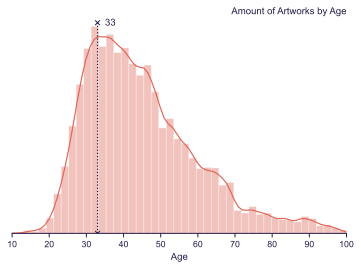

In [65]:
# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.left':False,
            'axes.spines.left': False, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
ax_age = sns.distplot(moma['age'], hist=True, rug=False)
ax_age.axvline(x=33, ymin=0, ymax=0.97, marker='x', linestyle=':', color=snark_palette[-1]) # 33 boundary

# Set some aesthetic params for the plot
ax_age.annotate('33', [35, 0.0325], c=snark_palette[-1]) # set label for the 33 boundary
ax_age.set_title('Amount of Artworks by Age', loc='right', pad=0, c=snark_palette[-1]) # set title of the plot
ax_age.set_xlabel('Age', c=snark_palette[-1]) # set label of x axis
ax_age.get_yaxis().set_visible(False) # hide y axis
ax_age.set_xticks([i for i in range(0, 110, 10)]) # set x ticks labels
ax_age.set_xlim([10, 100]) # set x axis range
ax_age.tick_params(axis='x', colors=snark_palette[-1]) # color x ticks
ax_age.spines['bottom'].set_color(snark_palette[-1]) # color x axis

# Save and plot
plt.savefig('plot.pic\plot.age.png', dpi=150)
plt.show()

It's curious that most of the works were created at the age of 33!  
33 is a meaningful age. For example, in Christianity, Jesus was crucified and then resurrected at the age of 33.

We can assume that there is a certain time lag between the origin of the idea and its implementation, the artist had an idea a little earlier.

### Plot by gender

We are interested in plotting the distribution of the number of artworks by age for men and women.

In [66]:
# Women
moma.loc[(moma['gender_clean'] == 'female'), 'age'].value_counts(normalize=True, bins=bins).head(20) * 100

(35.0, 40.0]      16.370506
(30.0, 35.0]      14.983175
(40.0, 45.0]      12.362005
(25.0, 30.0]      10.407934
(45.0, 50.0]      10.278057
(50.0, 55.0]       6.033414
(85.0, 90.0]       5.372218
(90.0, 95.0]       5.118366
(80.0, 85.0]       4.102958
(60.0, 65.0]       3.099357
(20.0, 25.0]       3.081646
(55.0, 60.0]       2.697916
(95.0, 100.0]      1.883228
(75.0, 80.0]       1.611665
(65.0, 70.0]       1.322392
(70.0, 75.0]       0.702521
(15.0, 20.0]       0.489994
(100.0, 105.0]     0.053132
(10.0, 15.0]       0.017711
(-0.001, 5.0]      0.011807
Name: age, dtype: float64

In [67]:
# Men
moma.loc[(moma['gender_clean'] == 'male'), 'age'].value_counts(normalize=True, bins=bins).head(20) * 100

(30.0, 35.0]     15.131045
(35.0, 40.0]     14.682748
(40.0, 45.0]     13.401606
(45.0, 50.0]     11.961093
(25.0, 30.0]     11.382214
(50.0, 55.0]      8.388085
(55.0, 60.0]      7.131620
(60.0, 65.0]      5.284967
(65.0, 70.0]      3.868102
(20.0, 25.0]      3.719013
(70.0, 75.0]      2.068746
(75.0, 80.0]      1.457993
(80.0, 85.0]      0.596358
(15.0, 20.0]      0.413338
(85.0, 90.0]      0.321828
(10.0, 15.0]      0.120300
(90.0, 95.0]      0.052438
(95.0, 100.0]     0.012338
(5.0, 10.0]       0.004113
(-0.001, 5.0]     0.002056
Name: age, dtype: float64

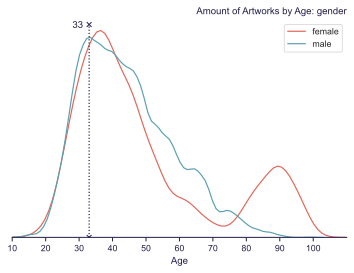

In [68]:
# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.left':False,
            'axes.spines.left': False, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
f_ag, ax_ag = plt.subplots()
sns.distplot(moma.loc[moma['gender_clean'] == 'female', 'age'], hist=False, rug=False, label='female', ax=ax_ag)
sns.distplot(moma.loc[moma['gender_clean'] == 'male', 'age'], hist=False, rug=False, label='male', ax=ax_ag)

ax_ag.axvline(x=33, ymin=0, ymax=0.98, marker='x', linestyle=':', color=snark_palette[-1]) # 33 boundary

# Set some aesthetic params for the plot
ax_ag.annotate('33', [28, 0.0323], c=snark_palette[-1]) # set label for the 33 boundary
ax_ag.legend() # set legend
ax_ag.set_title('Amount of Artworks by Age: gender', loc='right', c=snark_palette[-1]) # set title of the plot
ax_ag.set_xlabel('Age', c=snark_palette[-1]) # set label of x axis
ax_ag.get_yaxis().set_visible(False) # hide y axis
ax_ag.set_xticks([i for i in range(0, 110, 10)]) # set x ticks labels
ax_ag.set_xlim([10, 110]) # set x axis range
ax_ag.tick_params(axis='x', colors=snark_palette[-1]) # color x ticks
ax_ag.spines['bottom'].set_color(snark_palette[-1]) # color x axis

# Save and plot
plt.savefig('plot.pic\plot.age.gender.png', dpi=150)
plt.show()

It looks like thirty is really the most productive age.

For men, the distribution of the number of works reflects the pattern of 30 years.  
However, the plot is ambiguous for women, perhaps because of a small portion of the data.

Let's deep into the values for women.

In [69]:
# Women
print('Total by gender:', moma['gender_clean'].value_counts(), sep='\n')

# 46 peack
moma.loc[(moma['gender_clean'] == 'female'), 'age'].value_counts().head(20)

Total by gender:
male      97257
female    16939
Name: gender_clean, dtype: int64


46    665
36    648
37    622
41    586
38    567
32    559
35    557
39    521
33    486
31    469
34    467
30    458
45    435
40    415
43    395
42    374
28    373
29    361
49    353
27    336
Name: age, dtype: int64

For women, more artworks are created at the age of 46.

In [70]:
# Top5 women in 46
women_46_top5 = (moma.loc[(moma['gender_clean'] == 'female') & (moma['age'] == 46), 'artist']).value_counts().head()

print(women_46_top5)
moma.loc[(moma['artist'].isin(women_46_top5.index)) & (moma['age'] == 46)]

Lilly Reich      253
Doris Ulmann      91
Ynez Johnston     35
Gay Block         26
Kiki Smith        23
Name: artist, dtype: int64


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
50001,Untitled,Doris Ulmann,"(American, 1884–1934)",(American),(1884),(1934),(Female),1929-31,Photograph,Photography,1884,1934,female,american,1929,1931,NaN,NaN,1930,46
50002,"Roll, Jordan, Roll",Doris Ulmann,"(American, 1884–1934)",(American),(1884),(1934),(Female),1929-31,Photograph,Photography,1884,1934,female,american,1929,1931,NaN,NaN,1930,46
50003,Untitled,Doris Ulmann,"(American, 1884–1934)",(American),(1884),(1934),(Female),1929-31,Photograph,Photography,1884,1934,female,american,1929,1931,NaN,NaN,1930,46
50004,Untitled,Doris Ulmann,"(American, 1884–1934)",(American),(1884),(1934),(Female),1929-31,Photograph,Photography,1884,1934,female,american,1929,1931,NaN,NaN,1930,46
50005,Untitled,Doris Ulmann,"(American, 1884–1934)",(American),(1884),(1934),(Female),1929-31,Photograph,Photography,1884,1934,female,american,1929,1931,NaN,NaN,1930,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107260,Attachment for rubber strap (Perspective sketc...,Lilly Reich,"(German, 1885–1947)",(German),(1885),(1947),(Female),1931,Mies van der Rohe Archive,Architecture & Design,1885,1947,female,german,1931,1931,NaN,NaN,1931,46
107261,"Bed and couch, LR 600, 610, and 620 (Elevation...",Lilly Reich,"(German, 1885–1947)",(German),(1885),(1947),(Female),1931,Mies van der Rohe Archive,Architecture & Design,1885,1947,female,german,1931,1931,NaN,NaN,1931,46
107262,"Bed and couch, LR 600, 610, and 620 (Elevation...",Lilly Reich,"(German, 1885–1947)",(German),(1885),(1947),(Female),1931,Mies van der Rohe Archive,Architecture & Design,1885,1947,female,german,1931,1931,NaN,NaN,1931,46
107263,"Bed and mattress frame, LR 600 (Plan and eleva...",Lilly Reich,"(German, 1885–1947)",(German),(1885),(1947),(Female),1931,Mies van der Rohe Archive,Architecture & Design,1885,1947,female,german,1931,1931,NaN,NaN,1931,46


Five female artists influence the outliers of 46 years. More than others, [Lilly Reich](https://www.moma.org/artists/8059).

We can see a peak around 90 years on the plot. Let's take a closer look.

In [71]:
# 90 peack
print(moma.loc[(moma['gender_clean'] == 'female') & (moma['age'].between(80, 90)), 'age'].value_counts().head(20))

# Top5 women in 88
women_88_top5 = (moma.loc[(moma['gender_clean'] == 'female') & (moma['age'] == 88), 'artist']).value_counts().head()

print(women_88_top5)
moma.loc[(moma['artist'].isin(women_88_top5.index)) & (moma['age'] == 88)]

88    335
84    249
89    196
90    175
83    148
87    107
81    106
82    105
86     97
85     87
80     26
Name: age, dtype: int64
Louise Bourgeois       334
Sonia Delaunay-Terk      1
Name: artist, dtype: int64


,title,artist,artist_bio,nationality,begin_date,end_date,gender,date,classification,department,begin_date_clean,end_date_clean,gender_clean,nationality_clean,year_1,year_2,year_2_2,year_2_4,date_clean,age
35799,Color Rhythm No. 1921-1973,Sonia Delaunay-Terk,"(French, born Ukraine. 1885–1979)",(French),(1885),(1979),(Female),1973,Drawing,Drawings & Prints,1885,1979,female,french,1973,1973,NaN,NaN,1973,88
55942,Mother and Child,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Print,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
55943,The Angry Cat,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Print,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
55944,"The Angry Cat, state I of III (recto), Hanging...",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Print,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
55945,Champfleurette #2,Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Print,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124192,"Point d'Ironie, cover",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Illustrated Book,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
124193,"Point d'Ironie, spread 1 of 3",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Illustrated Book,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
124194,"Point d'Ironie, spread 2 of 3",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Illustrated Book,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88
124195,"Point d'Ironie, spread 3 of 3",Louise Bourgeois,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,Illustrated Book,Drawings & Prints,1911,2010,female,american,1999,1999,NaN,NaN,1999,88


This peak is characterized by works of Louise Bourgeois, an artist who did not pay attention to age.

You can find more about Louise Bourgeois and her creativity [here](https://en.wikipedia.org/wiki/Louise_Bourgeois) and [here](https://www.moma.org/artists/8059).

### Plot by nationality

Let's determine 4 nationalities with the largest number of the art objects.

In [72]:
nationality_top4 = moma['nationality_clean'].value_counts(normalize=False).head(4)
print(nationality_top4)

american    53589
french      20915
german       8559
british      5168
Name: nationality_clean, dtype: int64


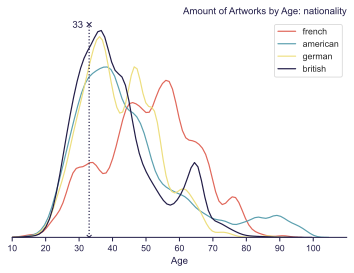

In [73]:
# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.left':False,
            'axes.spines.left': False, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
moma_nationality = moma.loc[moma['nationality_clean'].isin(nationality_top4.index), ['nationality_clean', 'age']] # data
g_an = sns.FacetGrid(moma_nationality, hue='nationality_clean')
g_an = g_an.map(sns.distplot, 'age', hist=False, rug=False)

g_an.ax.axvline(x=33, ymin=0, ymax=0.98, marker='x', linestyle=':', color=snark_palette[-1]) # 33 boundary

# Set some aesthetic params for the plot
g_an.fig.set_size_inches(6, 4)
g_an.ax.annotate('33', [28, 0.0415], c=snark_palette[-1]) # set label for the 33 boundary
g_an.ax.legend() # set legend
g_an.ax.set_title('Amount of Artworks by Age: nationality', loc='right', c=snark_palette[-1]) # set title of the plot
g_an.ax.set_xlabel('Age', c=snark_palette[-1]) # set label of x axis
g_an.ax.get_yaxis().set_visible(False) # hide y labels
g_an.despine(left=True) # hide y axis
g_an.ax.set_xticks([i for i in range(0, 110, 10)]) # set x ticks labels
g_an.ax.set_xlim([10, 110]) # set x axis range
g_an.ax.tick_params(axis='x', colors=snark_palette[-1]) # color x ticks
g_an.ax.spines['bottom'].set_color(snark_palette[-1]) # color x axis

# Save and plot
g_an.fig.subplots_adjust(bottom=0.125, top=0.88, left=0.125, right=0.9) # adjust for the post picture
g_an.savefig('plot.pic\plot.age.nationality.png', dpi=150, bbox_inches=None)
plt.show()

### Plot by century

Let's create the plot based on the centuries in which the artworks were created.  
First, we'll save the century in a separate column `century`.

In [74]:
# Extract 
moma['century'] = ((moma['date_clean'] // 100) + 1).astype(int)

# Inspect values
moma[['date_clean', 'century']]

,date_clean,century
0,1896,19
1,1987,20
2,1903,20
3,1980,20
4,1903,20
...,...,...
138156,1934,20
138157,1934,20
138158,1934,20
138159,1934,20


In [75]:
moma['century'].value_counts().sort_index(ascending=False)

21    12076
20    97626
19     4771
18       86
Name: century, dtype: int64

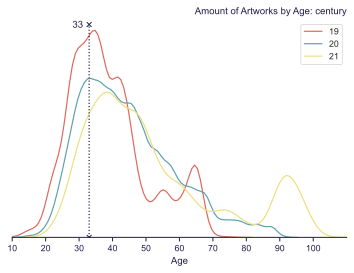

In [76]:
# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.left':False,
            'axes.spines.left': False, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
moma_century = moma.loc[moma['century'].isin([19, 20, 21]), ['century', 'age']] # data
g_ac = sns.FacetGrid(moma_century, hue='century')
g_ac = g_ac.map(sns.distplot, 'age', hist=False, rug=False)

g_ac.ax.axvline(x=33, ymin=0, ymax=0.98, marker='x', linestyle=':', color=snark_palette[-1]) # 33 boundary

# Set some aesthetic params for the plot
g_ac.fig.set_size_inches(6, 4)
g_ac.ax.annotate('33', [28, 0.041], c=snark_palette[-1]) # set label for the 33 boundary
g_ac.ax.legend() # set legend
g_ac.ax.set_title('Amount of Artworks by Age: century', loc='right', c=snark_palette[-1]) # set title of the plot
g_ac.ax.set_xlabel('Age', c=snark_palette[-1]) # set label of x axis
g_ac.ax.get_yaxis().set_visible(False) # hide y labels
g_ac.despine(left=True) # hide y axis
g_ac.ax.set_xticks([i for i in range(0, 110, 10)]) # set x ticks labels
g_ac.ax.set_xlim([10, 110]) # set x axis range
g_ac.ax.tick_params(axis='x', colors=snark_palette[-1]) # color x ticks
g_ac.ax.spines['bottom'].set_color(snark_palette[-1]) # color x axis

# Save and plot
g_ac.fig.subplots_adjust(bottom=0.125, top=0.88, left=0.125, right=0.9) # adjust for post picture
g_ac.savefig('plot.pic\plot.age.century.png', dpi=150, bbox_inches=None)
plt.show()

In total, *we found out, that 33 is really especial age!*


# Blog Post

In [77]:
blog_post = r"""
## WHEN IS MY BRAIN UP?🎓

The human brain reaches its peak efficiency by the age of 30*.  
That say the scientists, let's ask the data!  

📌We wondered if most of the artworks in the Moma database were actually created by artists in their 30s.  

Since the artworks have been included in the collection of the museum, they represent a valuable result of the human brain activity.  
We calculated the age when the artist created his work and ploted at what age the most of the valuable artworks was created.  
It's curious that most of the works were created at the age of 33!  
33 is a meaningful age.  
For example, in Christianity, Jesus was crucified and then resurrected at the age of 33.  

We can assume that there is a certain time lag between the origin of the idea and its implementation.  

(Interested in more details? Follow the link in bio for the entire research project!)  

\* (e.g, Chapter 6 of the book "Behave: The Biology of Humans at Our Best and Worst" by Robert M. Sapolsky)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_brain \#human_brain \#art \#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
"""

# Check post text length for Instagram
len(blog_post)

1172

In [78]:
from IPython.display import Markdown as md
md(blog_post)


## WHEN IS MY BRAIN UP?🎓

The human brain reaches its peak efficiency by the age of 30*.  
That say the scientists, let's ask the data!  

📌We wondered if most of the artworks in the Moma database were actually created by artists in their 30s.  

Since the artworks have been included in the collection of the museum, they represent a valuable result of the human brain activity.  
We calculated the age when the artist created his work and ploted at what age the most of the valuable artworks was created.  
It's curious that most of the works were created at the age of 33!  
33 is a meaningful age.  
For example, in Christianity, Jesus was crucified and then resurrected at the age of 33.  

We can assume that there is a certain time lag between the origin of the idea and its implementation.  

(Interested in more details? Follow the link in bio for the entire research project!)  

\* (e.g, Chapter 6 of the book "Behave: The Biology of Humans at Our Best and Worst" by Robert M. Sapolsky)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_brain \#human_brain \#art \#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
